# 2) Sorting Algorithms

---

## 1. Quick Sort

We will take a look at the Quick Sort as our third algorithm. Just as the Merge Sort it is a divide and conquer algorithm.
The merge sort split an array in two smaller until the sorting of this array is trival and then merge the sorted array in a new array while keeping the sorting property. Meaning that most of the cost is spent in merging than in dividing. In the Quick Sort algorithm most of the cost is in the dividing part of the algorithm. Instead of spliting in two unsorted array the Quick Sort split in two array such as every element in the first array is smaller than every element in the second. The two arrays created this way will in most of the case have different size if we choose the delimiter randomly leading in a worst case scenario in O(n²). It is possible to always use the best pivot by using the median of the array, however the time spent looking for the meadian doesn't worth the time loose by randomly choosing a pivot in most of the cases.

Quick Sort had some improovement over the time, we will cover some of them and try to see witch one perform the better in python.

## 2. Implementing Sorts

In [2]:
def select_sort(T):
    n=len(T)
    for i in range(n-1):
        mini=i
        for j in range(i+1,n):
            if(T[j]<T[mini]):
                mini=j
        if(mini!=i):
            k=T[i]
            T[i]=T[mini]
            T[mini]=k
    return T

def merge(A,B):
    maxA=len(A)
    maxB=len(B)
    c=[]
    a=0
    b=0
    while (a!=maxA and b!=maxB):
        if(A[a]<B[b]):
            c.append(A[a])
            a+=1
        else:
            c.append(B[b])
            b+=1

    while(a!=maxA):
        c.append(A[a])
        a+=1
        
    while(b!=maxB):
        c.append(B[b])
        b+=1
    
    return c

def merge_sort(data):
    n=len(data)
    if n>1 :
        D1=merge_sort(data[:n//2])
        D2=merge_sort(data[n//2:])
        return merge(D1,D2)
    return data
    
def quick_sort(data,start=0,end=None):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return
    
    p = (start + end)//2
    j = start
    s = data[end]
    data[end]=data[p]
    data[p] = s
    for i in range(start,end):
        if(data[i]<= data[end]):
            s=data[i]
            data[i] = data[j]
            data[j] = s
            j+=1
    p=j
    
    s = data[end]
    data[end]=data[p]
    data[p] = s
    
    quick_sort(data,start,p-1)
    quick_sort(data,p+1,end)
    return(data)

The `merge` function as been adapted to avoid trying to acces to undifined parts of B and A. The quick sort has been implemented usinf the lomuto partition scheme and both algorithms have been implemented naively in the sense that no specific considaration about the time cost of growing array or any optisation possible by using specific python's behavior has been taken. 
  
Now in order to test the functions we will need some other functions.

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
import timeit

def near(data, value):
    n = len(data)
    assert n > 0
    if(n == 1):
        return 0
    left = 0
    right = n - 1
    middle = 0
    while left <= right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle
    return middle

def createRandomSortedList(num,start = 1,end = None):
    if(end == None):
        end = start+num*10
    arr = [random.randint(start,end)]
    tmp = random.randint(start,end)
    assert end-start>num
    for x in range(num-1):
        i = near(arr,tmp)
        while arr[i]==tmp:
            tmp = random.randint(start,end)
            i=near(arr,tmp)
        if arr[i] > tmp:
            arr.insert(i,tmp)
        else:
            arr.insert(i+1,tmp)
    return arr

def createRandomUnSortedList(num, start = 1, end = None):
    if(end == None):
        end = start+num*10
    Sarr = createRandomSortedList(num,start,end)
    random.shuffle(Sarr)
    return Sarr

def logEmpty(n):
    i =0
    while i<n:
        n/=2
        i+=1

def plotTime(funList,points,argProvider,plot,repeat:int = 10,warm=False):
    def warmFun(*args):
        return funList[1](*args)
    if(warm):
        funList.insert(0,warmFun)
    timeVal={fun.__name__:[0]*len(points) for fun in funList}
    
    for (i,v) in enumerate(points):
        for _ in range(repeat):
            args = argProvider(v)
            for fun in funList:
                timeVal[fun.__name__][i] += timeit.timeit(lambda: fun(*args), number=1)
        
        for fun in funList:
            timeVal[fun.__name__][i] /= repeat
    
    funlist.remove(warmFun)
    
    for fun in funList:
        plot.plot(points,timeVal[fun.__name__],label=fun.__name__)
        
    plt.xlabel("value of n")
    plt.ylabel("time (s)")
    plot.legend()
    
    return (plot,timeVal)

def linspace(min:int,max:int,number:int):
    return [int(x) for x in np.linspace(min,max,number)]

All of the folling curves will be made using the `plotTime` function, this function allow for different argument depending on the size of the problem and redondant measures to improove accuraty. For each repetition of the mesure new arguments are generated and argument are shared by all of the functions tested during this repeatition. 

In [5]:
array = createRandomUnSortedList(100000)

In [ ]:
plotTime([merge_sort,quick_sort,select_sort],linspace(2,1000,100),lambda n:[array[:n]],plt)
plt.show()

In [ ]:
plotTime([merge_sort,quick_sort],linspace(1000,5000,200),lambda n:[array[:n]],plt)
plt.show()

In [ ]:
plotTime([merge_sort,quick_sort],linspace(20000,30000,100),lambda n:[array[:n]],plt)
plt.show()

As we can see the selection sort is really inneficent compared to the merge sort and the quick sort. We can also notice that the quick sort is less stable and predictable than the merge sort. We will now try to improve our quick sort and merge sort.

In [6]:
def quick_sort_hoare(data,start=0,end=None):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_hoare(data,start,j-1)
    quick_sort_hoare(data,j+1,end)
    return(data)

In [ ]:
plotTime([quick_sort,quick_sort_hoare,merge_sort],linspace(60000,70000,100),lambda n:[array[:n]],plt)
plt.show()

As we can see here simply changing the way we split our array in two improove our quick sort making it less chaotic and more time efficent than the merge sort. Another way of optimizing the quick sort is to replace it by another sort for sorter array.

In [7]:
def quick_sort_select(data,start=0,end=None,threshold=10):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return 
    if end-start <= threshold :
        return select_sort(data)
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_select(data,start,j-1)
    quick_sort_select(data,j+1,end)
    return(data)

def quick_sort_merge(data,start=0,end=None,threshold=10):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return 
    if end-start <= threshold :
        return merge_sort(data)
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_merge(data,start,j-1)
    quick_sort_merge(data,j+1,end)
    return(data)

def bubble_sort(data,start=0,end=None):
    if end == None:
        end = len(data)-1
        
    for i in range(start,end+1):
        for j in range(start,end-(i-start)):
            if(data[j]>data[j+1]):
                s=data[j]
                data[j]=data[j+1]
                data[j+1]=s
    return data

def quick_sort_bubble(data,start=0,end=None,threshold=10):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return 
    if end-start <= threshold :
        return bubble_sort(data,start,end)
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_bubble(data,start,j)
    quick_sort_bubble(data,j+1,end)
    return(data)

In [ ]:
plotTime([quick_sort_select,quick_sort_merge,quick_sort_bubble],linspace(2,10000,100),lambda n:[array[:n]],plt)
plt.show()

As we can see here the version using the selection sort is way heavier than the two others but more surprisingly the bubble sort version plair fair with the merge sort version whereas the bubble sort is know for it's unffectiveness. But it's not like they are equivalent on low value of n but when n goes larger the merge version gain in effectiveness it's the exact opposite. 

In [ ]:
plotTime([quick_sort_merge,quick_sort_bubble],linspace(30000,40000,100),lambda n:[array[:n]],plt)
plt.show()

Now we have the best hybride we can compaire it ,with the original quick sort. As we can see here the bubble hybride is better than the original. The difference is not increadible but still there and really impressive knowing how inneficient is the bubble sort

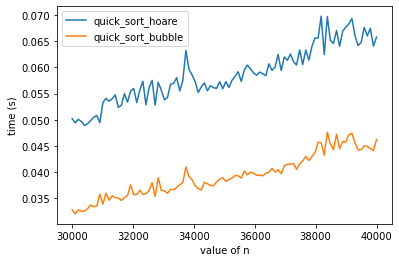

In [66]:
plotTime([quick_sort_hoare,quick_sort_bubble],linspace(30000,40000,100),lambda n:[array[:n]],plt,warm = True)
plt.show()

The question is know : Why is the bubble hybride better than the original ?  
This question have three answer that could explainthe current curve. 
- The first explanation is the bubble sort come after the quick already did a lot of work and made the array "K sorted" meaning all the element are at most at k place away from where they should be. Knowing this a some sort can take advantage of this and sorting on one of there best case most of the time.
- The second explanation is those sort does less work on smaller arrays than the quick sort which start making a lot of swap when the array goes smaller compared to the first itaration.
- Last but not least explanation : recurcive function are always heavier than the same function not recusive. This simply mean that in practice there is an extra cost of calling recurcivly a function. As the array is splited in smaler parts the cost of recurtion double each new spliting but by mooving up the minimal size we avoid a big part of this cost.

The first solution is not the right as the current implementation is far from optimal and the best cases doesn't exist with this version. However the second and third possibilities can explain this difference, even if in the case of the second explainantion we can doubt the current implementation does less work on smaller arrays.  
By first using a bad implementation of the sort we can easly see which part of the time gain we earn from algorithm optimisation and which comes from implementation optimisation.


In [8]:
def sbubble_sort(data,start=0,n=None):
    if n == None:
        n = len(data)
    while n > 0:
        newn = 0
        for j in range(start+1,n):
            if(data[j-1]>data[j]):
                s=data[j]
                data[j]=data[j-1]
                data[j-1]=s
                newn=j
        n=newn
    return data

def quick_sort_sbubble(data,start=0,end=None,threshold=10):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return 
    if end-start <= threshold :
        return sbubble_sort(data,start,end+1)
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_sbubble(data,start,j-1)
    quick_sort_sbubble(data,j+1,end)
    return(data)

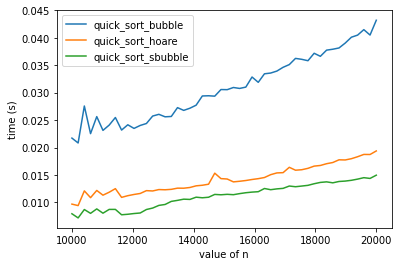

In [12]:
plotTime([quick_sort_bubble,quick_sort_hoare,quick_sort_sbubble],linspace(10000,20000,50),lambda n:[array[:n]],plt)
plt.show()

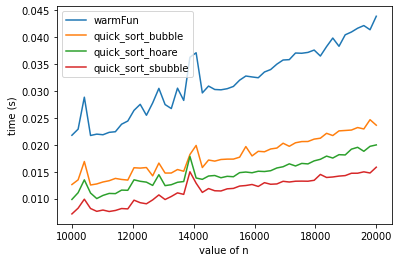

In [17]:
plotTime([quick_sort_bubble,quick_sort_hoare,quick_sort_sbubble],linspace(10000,20000,50),lambda n:[array[:n]],plt,warm=True)
plt.show()

In [11]:
def Lord_Of_The_quick_sort(data,start=0,end=None,threshold=10):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return 
    if end-start <= threshold :
        return sbubble_sort(data,start,end+1)
    
    mid = (start + end)//2
    
    if (data[mid]<data[start]):
        s=data[mid]
        data[mid]=data[start]
        data[start]=s
        
    if (data[end]<data[start]):
        s=data[end]
        data[end]=data[start]
        data[start]=s
        
    if (data[mid]<data[end]):
        s=data[mid]
        data[mid]=data[end]
        data[end]=s
    
    p = data[end]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    Lord_Of_The_quick_sort(data,start,j-1)
    Lord_Of_The_quick_sort(data,j+1,end)
    return(data)

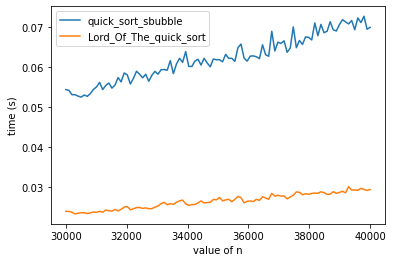

In [70]:
plotTime([quick_sort_sbubble],linspace(30000,40000,100),lambda n:[array[:n]],plt)
plotTime([Lord_Of_The_quick_sort],linspace(30000,40000,100),lambda n:[array[:n]],plt)
plt.show()

[100396, 67809, 148918, 128594, 7871, 198968, 222318, 193549, 15644, 306726, 537969, 605897, 808334, 815731, 817982]
[67809, 100396, 128594, 7871, 148918, 198968, 193549, 15644, 222318, 306726, 537969, 605897, 808334, 815731, 817982]
[67809, 100396, 7871, 128594, 148918, 193549, 15644, 198968, 222318, 306726, 537969, 605897, 808334, 815731, 817982]
[67809, 7871, 100396, 128594, 148918, 15644, 193549, 198968, 222318, 306726, 537969, 605897, 808334, 815731, 817982]
[7871, 67809, 100396, 128594, 15644, 148918, 193549, 198968, 222318, 306726, 537969, 605897, 808334, 815731, 817982]
[7871, 67809, 100396, 15644, 128594, 148918, 193549, 198968, 222318, 306726, 537969, 605897, 808334, 815731, 817982]
[7871, 67809, 15644, 100396, 128594, 148918, 193549, 198968, 222318, 306726, 537969, 605897, 808334, 815731, 817982]
[7871, 15644, 67809, 100396, 128594, 148918, 193549, 198968, 222318, 306726, 537969, 605897, 808334, 815731, 817982]
[7871, 15644, 67809, 100396, 128594, 148918, 193549, 198968, 222